[*********************100%***********************]  1 of 1 completed

Epoch 1/100



/home/yogi/miniconda3/envs/chronos-zero-shot/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


112/112 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - loss: 0.0130 - val_loss: 2.3767e-04
Epoch 2/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0024 - val_loss: 3.1901e-04
Epoch 3/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0022 - val_loss: 2.9909e-04
Epoch 4/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0019 - val_loss: 1.5839e-04
Epoch 5/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0016 - val_loss: 1.5124e-04
Epoch 6/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0015 - val_loss: 1.9583e-04
Epoch 7/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0019 - val_loss: 2.6641e-04
Epoch 8/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0013 - val_loss: 1.5281e-04
Epoch 9/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0012 - val_loss: 1.5645e-04
Epoch 10/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0011 - val_loss: 1.1141e-04
Epoch 11/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0012 - val_loss: 2.9354e-0

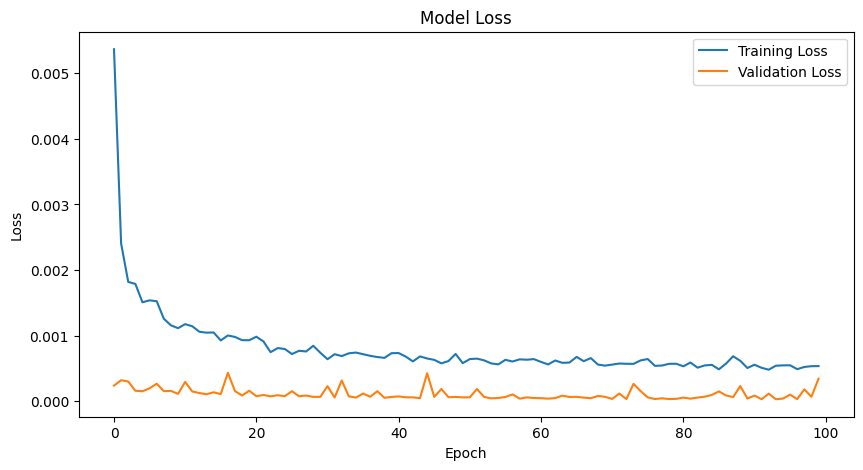

In [9]:
# Importing required libraries
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
import matplotlib.dates as mdates

# Download historical data for SPY from Yahoo Finance
# spy = yf.download('SPY', start='2010-01-01', end='2023-01-01')

df = pd.read_csv('/home/yogi/chronos-research/dataset/LQ45-daily/ANTM.csv')

# Hitung 80% dari total baris
train_model_size = int(0.8 * len(df))

# Ambil 70% pertama dari data
df = df.head(train_model_size)
train_size = int(0.8 * len(df))

training_data = df.loc[:train_size, 'close']
validation_data = df.loc[train_size:, 'close']

# Split data into training (2010-2020) and validation (2020-2023) sets
# training_data = spy['Adj Close']['2010-01-01':'2020-12-31']
# validation_data = spy['Adj Close']['2021-01-01':'2023-01-01']

# Use 'Adj Close' prices as the stock price for training
training_set = training_data.values.reshape(-1, 1)
validation_set = validation_data.values.reshape(-1, 1)

# Feature scaling using MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(training_set)
validation_set_scaled = sc.transform(validation_set)

# Creating input sequences for training
def create_sequences(data, seq_length=60):
    X = []
    y = []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

X_train, y_train = create_sequences(training_set_scaled)
X_validation, y_validation = create_sequences(validation_set_scaled)

# Reshape inputs for LSTM model
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_validation = np.reshape(X_validation, (X_validation.shape[0], X_validation.shape[1], 1))

# Building the LSTM Model
model = keras.Sequential()
model.add(keras.layers.LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.LSTM(units=50, return_sequences=True))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.LSTM(units=50, return_sequences=True))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.LSTM(units=50))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(units=1))

# Compiling the LSTM Model
model.compile(optimizer='adam', loss='mean_squared_error')

# Training the Model and store history
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_validation, y_validation))

# Plot loss and accuracy during training
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

19/36 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


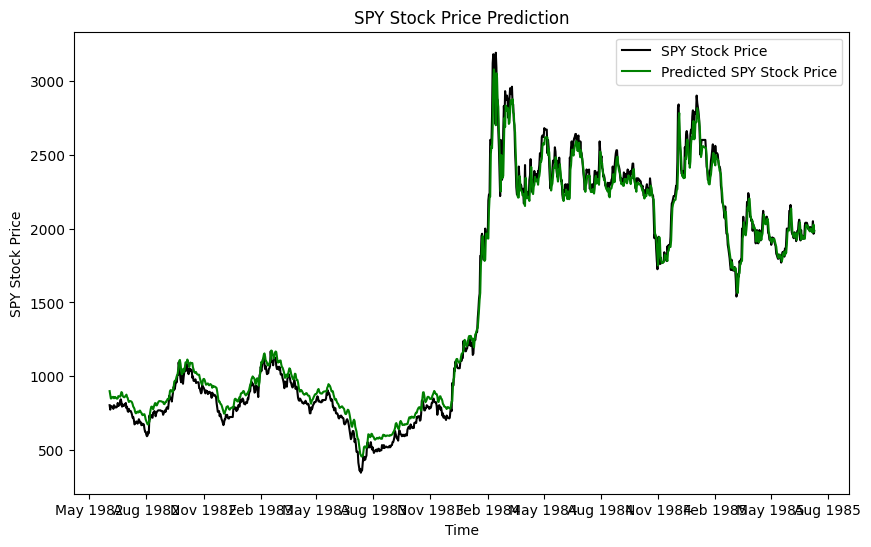

In [50]:
# Download test data for SPY from Yahoo Finance
# spy_test = yf.download('SPY', start='2023-01-01', end='2023-07-31')

data = pd.read_csv('/home/yogi/chronos-research/dataset/LQ45-daily/ANTM.csv')
train_model_size = int(0.8 * len(data))
df_test = data.loc[train_model_size:]

real_stock_price = df_test['close'].values.reshape(-1, 1)

# Use 'Adj Close' prices as the test data
# real_stock_price = spy_test['Adj Close'].values.reshape(-1, 1)

# Preparing Test Data
dataset_total = pd.concat((df['close'], df_test['close']), axis=0)
inputs = dataset_total[len(dataset_total) - len(df_test) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, len(inputs)):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Making Predictions
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

# Prepare dates for the predicted stock prices
date_range = pd.date_range(start=df_test['timestamp'].iloc[0], periods=len(predicted_stock_price), freq='B')  # 'B' for business day frequency

# Visualizing Results with Month and Year on X-axis
plt.figure(figsize=(10, 6))
plt.plot(df_test.index, real_stock_price, color='black', label='SPY Stock Price')
plt.plot(df_test.index, predicted_stock_price, color='green', label='Predicted SPY Stock Price')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # Show tick marks for every 3 months
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Format x-axis labels as 'Jan 2023', 'Feb 2023', etc.
plt.title('SPY Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('SPY Stock Price')
plt.legend()
plt.show()

In [51]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate Mean Absolute Error
mae = mean_absolute_error(real_stock_price, predicted_stock_price)
print('Mean Absolute Error:', mae)

# Calculate Mean Squared Error
mse = mean_squared_error(real_stock_price, predicted_stock_price)
print('Mean Squared Error:', mse)

# Calculate Root Mean Squared Error
rmse = np.sqrt(mse)  # Or directly use mean_squared_error with squared=False
print('Root Mean Squared Error:', rmse)


Mean Absolute Error: 59.0044906858414
Mean Squared Error: 5600.09940094718
Root Mean Squared Error: 74.83381188304642
